# Linear regression : 선형회귀

### 종속변수(응답변수) y와 한 개 이상의 독립변수(설명변수) X와의 선형 상관관계를 모델링하는 회귀분석 방법
> * 1) 한 개의 독립 변수에 기반한 경우에 단순 선형 회귀
> * 2) 둘 이상의 독립변수에 기반한 경우 다중 선형 회귀
>.

#### 독립변수와 종속변수 간의 상관관계를 나타내는 척도를 상관계수(correlation coefficient) 보통 r로 표시
>    - 여러 상관 계수가 있지만 선형 회귀의 상관계수로 가장 많이 쓰이는 것은 피어슨 상관 계수(Pearson corelation coefficient)
>        - 피어슨 상관 계수는 선형 관계의 강도와 방향을 나타내며 -1 ~ 1 사이의 값으로 표시
>        - 선형계수가 -1일수록 음의 상관관계를 가지고, 1일수록 양의 상관관계를 가짐
>    - 피어슨 상관 계수는 선형 관계일 때만 유의미하고, 2차식에서는 의미가 없음.
#### 결정계수(R-squared) : coefficient of determination
> 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도
> 종속 변수의 변동량 중에서 적용한 모형으로 설명 가능한 부분의 비율을 가리킴
> - 통상적으로 R**2으로 표시
> 일반적으로 모형의 설명력으로 해석되지만 모형에 설명변수가 들어갈수록 증가하기 때문에 해석에 유의해야 함
>    - 0 ~ 1사이의 값을 가지는데 커질수록 종속변수와 독립변수 사이의 상관관계가 높음을 의미
> #### 즉 결정계수가 0에 가까운 값을 가지는 회귀모형은 유용성이 낮은 반면, 값이 클수록 회귀모형의 유용성이 높다고 할 수 있음

# MultiLinearity : 다중공선성

### 회귀분석에서 사용된 모형의 일부 설명변수가 다른 설명변수와 상관 정도가 높아 데이터 분석 시 부정적인 영향을 미치는 현상
#### - 일반적으로 회귀분석 시 설명변수의 영향력을 파악할 때, 설명변수들끼리 독립을 가정함

### 예) 학업성취도(종속변수 Y), 일평균음주량(독립변수 X1), 혈중 알코올 농도(독립변수 X2)
> ####   - X1, X2는 완전한 독립이 아니므로 다중공선성 문제 발생
> ####  이 변수들을 그대로 회귀모형에 적용시키면 X1, X2 중 하나는 유익한 변수로 나타나고 반면 다른 한 변수는 불안정한 계수값을 보임

.

.
## -> 이처럼 독립변수간 상관관계를 보이는 것을 다중공선성(Multicollinearity)라고 함
    - 다중공선성이 있으면 부정확한 회귀 결과 도출 (X,Y의 상관관계가 반대로 나온다던가 검정 결과가 다르게 나온다던가 하는 문제)

### 회귀 모델에 다중공선성이 있는지 파악하는 방법은 두 가지가 있음
#### 1. 산점도 그래프
#### 2. VIF (Variance Inflation Factors, 분산팽창요인)
    - 독립변수간 상관관계를 측정하는 척도
    - VIF = 1 / 1-R**2
> VIF가 10이 넘으면 다중공선성이 있다고 판단하며 5가 넘으면 주의할 필요가 있는 것으로 판단

> 두 변수가 상관관계가 있다고 하면 두 변수 모두 VIF가 높음. 어느 하나만 높게 나오는 경우는 없음

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("C:\\Users\\HANSUHO\\Desktop\\house_prices.csv")
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [9]:
# 침실개수(bedrooms), 화장실 개수(bathrooms), 집크기(area) 간 상관관계가 있는지 Scatter plot

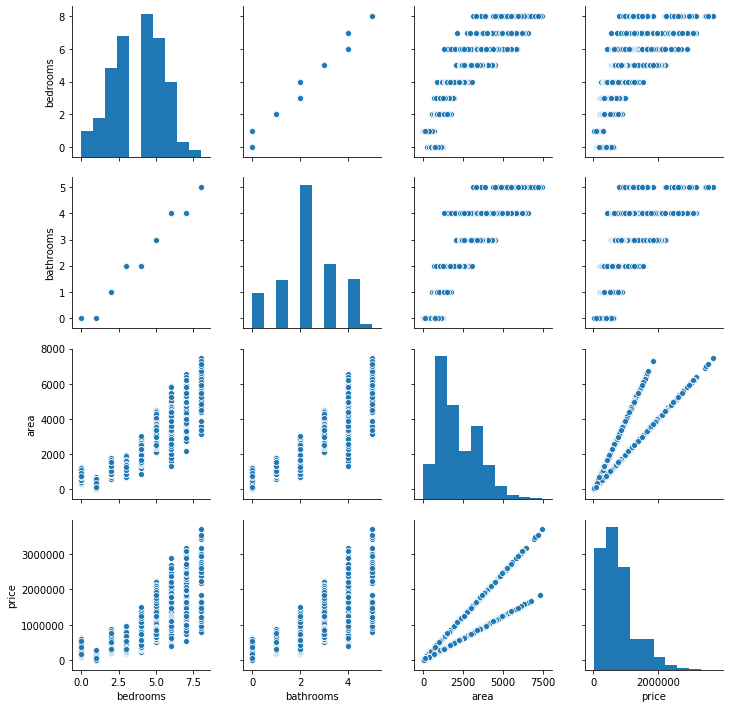

In [13]:
sns.pairplot(df[['bedrooms','bathrooms','area','price']])

In [12]:
# OLS : Ordinary Least Square
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept','bedrooms','bathrooms','area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        02:17:32   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### bedrooms의 coef가 -2925.8063이 나옴
- 침실 개수와 집값이 음의 상관관계를 갖는다는 뜻임
- 다중공선성으로 인해 회귀결과가 잘못나온 것

In [14]:
## VIF를 통한 다중공선성 문제 파악

y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF Factors'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factors,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


## VIF 10 이상 변수 drop을 통한 다중공선성 문제 해결

In [20]:
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms','area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        02:34:08   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### bedrooms의 coef가 1626.8306으로 양수가 됨. (양의 상관관계)
> 침실 개수가 늘어남에 따라 집 값도 높아짐을 의미

In [22]:
y, X = dmatrices('price ~ area + bedrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIF Factors'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factors,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms


### bathrooms를 drop하지 않은 모델과 drop한 모델 모두 0.678의 R-squared 값을 가짐
> 결정계수는 회귀모형 유용성의 척도

> drop 전후가 동일하게 0.678이라는 것은 bedrooms와 bathrooms 두 변수 모두가 필요하지 않다는 뜻임

> 둘 중 하나만 있어도 된다는 뜻. drop 이후에도 모델의 예측력에 영향을 끼치지 않음

refernce : https://bkshin.tistory.com/entry/DATA-17-Regression